# pycaret machine learning

# setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reference: https://www.pycaret.org/
# reference: https://pycaret.org/guide/
# reference: https://github.com/pycaret/

In [3]:
# reference: https://pycaret.org/install/
# pip install pycaret
# pip install pycaret==2.0
# pip install pycaret-nightly (if stable won't install)
# conda install -c conda-forge shap

In [4]:
import pycaret
from pycaret import classification, regression, clustering, nlp, utils

In [5]:
utils.version()

2.0


In [6]:
# workflow:
# .setup() > process data
# .compare_models() > find best model
# .create_model() > create model
# .tune_model() > tune model hyperparameters for 'accuracy' metric 
# .optimize_threshold() > precision vs. recall, when false positive != false negative (classification)
# .calibrate_model() > calibrate model propabilities (classification)
# .evaluate_model() > result plots
# .interpret_model() > interpretation plot
# .automl() > select best model generated based on metric
# .predict_model() > predictions on test data
# .finalize_model() > recreate model with all data
# .deploy_model()

In [7]:
# ensemble examples:
# blender = blend_models(estimator_list = [dt,rf,adaboost], method = 'soft')
# blender_top5_dynamic = blend_models(compare_models(n_select = 5))
# stacker = stack_models(estimator_list = [dt,rf], meta_model = adaboost)
# stacker_top5_dynamic = stack_models(estimator_list = comparemodels(n_select = 5)[1:], 
#    meta_model = compare_models(n_select = 5)[0])

In [8]:
# other functions:
# .save_model()
# .load_model()
# .get_config()
# .get_logs() 
# .get_system_logs()
# .set_seed()

In [9]:
# integration with mlflow:
# pip install mlflow
# !mlflow ui

# datasets

In [10]:
df_titanic = sns.load_dataset('titanic')
df_iris = sns.load_dataset('iris')
df_diamonds = sns.load_dataset('diamonds')

# classification (binary)

In [11]:
# process dataset
classification_experiment_1 = classification.setup(
    data=df_titanic,
    target='survived',
    train_size=0.7,
    normalize=True,
    numeric_features=['age','sibsp','parch','fare'],
    categorical_features=['sex','who','adult_male','alone','embarked'], 
    ordinal_features={'pclass' : ['3','2','1']},
    ignore_features=['embark_town','alive','class','deck'],
    log_experiment = True, 
    experiment_name = 'classification_experiment_1'
)

Setup Succesfully Completed!


,Description,Value
0,session_id,5902
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 15)"
4,Missing Values,True
5,Numeric Features,4
6,Categorical Features,8
7,Ordinal Features,True
8,High Cardinality Features,False
9,High Cardinality Method,None


In [12]:
# automatically compare all models 
best_classification_models = classification.compare_models(
    turbo=False,
    n_select=5,
    blacklist=['catboost']
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,SVM - Radial Kernel,0.8249,0.8481,0.7192,0.8071,0.7581,0.6219,0.6266,0.0780
1,Linear Discriminant Analysis,0.8185,0.8700,0.7361,0.7816,0.7547,0.6113,0.6152,0.0234
2,Logistic Regression,0.8169,0.8700,0.7404,0.7788,0.7555,0.6097,0.6137,0.0745
3,Ridge Classifier,0.8169,0.0000,0.7319,0.7806,0.7521,0.6076,0.6115,0.0074
4,Gradient Boosting Classifier,0.8168,0.8746,0.7071,0.7959,0.7466,0.6044,0.6089,0.1301
5,Ada Boost Classifier,0.8073,0.8512,0.7404,0.7561,0.7460,0.5910,0.5933,0.1184
6,Light Gradient Boosting Machine,0.8072,0.8613,0.7114,0.7715,0.7367,0.5858,0.5899,0.0531
7,MLP Classifier,0.7993,0.8566,0.6688,0.7826,0.7175,0.5637,0.5709,2.1310
8,Naive Bayes,0.7945,0.8429,0.7025,0.7516,0.7227,0.5601,0.5642,0.0046
9,Extra Trees Classifier,0.7944,0.8282,0.7197,0.7381,0.7264,0.5623,0.5644,0.1692


In [13]:
# automatically compare all models 
best_classification_models_2 = classification.compare_models(
    turbo=False,
    n_select=5,
    sort='AUC',
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.8201,0.8790,0.6986,0.8113,0.7463,0.6089,0.6166,1.2530
1,Gradient Boosting Classifier,0.8168,0.8746,0.7071,0.7959,0.7466,0.6044,0.6089,0.0966
2,Linear Discriminant Analysis,0.8185,0.8700,0.7361,0.7816,0.7547,0.6113,0.6152,0.0141
3,Logistic Regression,0.8169,0.8700,0.7404,0.7788,0.7555,0.6097,0.6137,0.0657
4,Light Gradient Boosting Machine,0.8072,0.8613,0.7114,0.7715,0.7367,0.5858,0.5899,0.0423
5,Gaussian Process Classifier,0.7928,0.8591,0.6649,0.7688,0.7082,0.5497,0.5570,0.1738
6,MLP Classifier,0.7993,0.8566,0.6688,0.7826,0.7175,0.5637,0.5709,2.0312
7,K Neighbors Classifier,0.7913,0.8550,0.6855,0.7530,0.7144,0.5509,0.5552,0.0035
8,Extreme Gradient Boosting,0.7880,0.8518,0.7116,0.7303,0.7180,0.5488,0.5516,0.1021
9,Ada Boost Classifier,0.8073,0.8512,0.7404,0.7561,0.7460,0.5910,0.5933,0.0822


In [14]:
# models info
classification.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


In [15]:
# create a model 
# 'lr'        Logistic Regression             
# 'knn'       K Nearest Neighbour            
# 'nb'        Naive Bayes             
# 'dt'        Decision Tree Classifier                   
# 'svm'       SVM - Linear Kernel                 
# 'rbfsvm'    SVM - Radial Kernel               
# 'gpc'       Gaussian Process Classifier                  
# 'mlp'       Multi Level Perceptron                  
# 'ridge'     Ridge Classifier                
# 'rf'        Random Forest Classifier                   
# 'qda'       Quadratic Discriminant Analysis                  
# 'ada'       Ada Boost Classifier                 
# 'gbc'       Gradient Boosting Classifier                  
# 'lda'       Linear Discriminant Analysis                  
# 'et'        Extra Trees Classifier                   
# 'xgboost'   Extreme Gradient Boosting              
# 'lightgbm'  Light Gradient Boosting              
# 'catboost'  CatBoost Classifier   
classification_model = classification.create_model(
    estimator='rf'
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8730,0.8868,0.8333,0.8333,0.8333,0.7308,0.7308
1,0.7937,0.8483,0.7500,0.7200,0.7347,0.5660,0.5663
2,0.8254,0.8787,0.7500,0.7826,0.7660,0.6268,0.6272
3,0.8226,0.8980,0.7391,0.7727,0.7556,0.6164,0.6168
4,0.8226,0.8372,0.7500,0.7826,0.7660,0.6232,0.6236
5,0.7258,0.8081,0.5833,0.6667,0.6222,0.4085,0.4108
6,0.7097,0.8098,0.6250,0.6250,0.6250,0.3882,0.3882
7,0.7258,0.7719,0.6667,0.6400,0.6531,0.4266,0.4268
8,0.8226,0.8854,0.8750,0.7241,0.7925,0.6399,0.6487
9,0.7419,0.7675,0.5000,0.7500,0.6000,0.4206,0.4394


In [16]:
# view results in dataframe
classification_model_results_df = classification.pull()
classification_model_results_df

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8730,0.8868,0.8333,0.8333,0.8333,0.7308,0.7308
1,0.7937,0.8483,0.7500,0.7200,0.7347,0.5660,0.5663
2,0.8254,0.8787,0.7500,0.7826,0.7660,0.6268,0.6272
3,0.8226,0.8980,0.7391,0.7727,0.7556,0.6164,0.6168
4,0.8226,0.8372,0.7500,0.7826,0.7660,0.6232,0.6236
5,0.7258,0.8081,0.5833,0.6667,0.6222,0.4085,0.4108
6,0.7097,0.8098,0.6250,0.6250,0.6250,0.3882,0.3882
7,0.7258,0.7719,0.6667,0.6400,0.6531,0.4266,0.4268
8,0.8226,0.8854,0.8750,0.7241,0.7925,0.6399,0.6487
9,0.7419,0.7675,0.5000,0.7500,0.6000,0.4206,0.4394


In [17]:
# custom model hyperparameters
example_classification_model_hyperparameters_1 = classification.create_model(
    estimator='lightgbm',
    learning_rate=0.1,
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8730,0.9252,0.8333,0.8333,0.8333,0.7308,0.7308
1,0.8254,0.8761,0.7917,0.7600,0.7755,0.6328,0.6331
2,0.8413,0.8921,0.7500,0.8182,0.7826,0.6580,0.6595
3,0.7903,0.8629,0.7391,0.7083,0.7234,0.5547,0.5550
4,0.8226,0.8673,0.7083,0.8095,0.7556,0.6173,0.6207
5,0.8065,0.8454,0.6667,0.8000,0.7273,0.5792,0.5850
6,0.7742,0.8454,0.5833,0.7778,0.6667,0.5011,0.5130
7,0.7903,0.7895,0.7083,0.7391,0.7234,0.5547,0.5550
8,0.7903,0.8980,0.7917,0.7037,0.7451,0.5681,0.5709
9,0.7581,0.8114,0.5417,0.7647,0.6341,0.4612,0.4765


In [18]:
# custom model hyperparameters: use xgboost gpu
example_classification_model_hyperparameters_2 = classification.create_model(
    estimator='xgboost',
    ltree_method = 'gpu_hist', 
    max_depth=10,
    gpu_id = 0,
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8254,0.9231,0.8333,0.7407,0.7843,0.6385,0.6416
1,0.7619,0.8376,0.7500,0.6667,0.7059,0.5070,0.5095
2,0.8254,0.8942,0.7500,0.7826,0.7660,0.6268,0.6272
3,0.8387,0.8506,0.8261,0.7600,0.7917,0.6605,0.6620
4,0.7581,0.8629,0.6667,0.6957,0.6809,0.4862,0.4865
5,0.7419,0.8224,0.6667,0.6667,0.6667,0.4561,0.4561
6,0.7581,0.8388,0.7083,0.6800,0.6939,0.4940,0.4943
7,0.7419,0.7873,0.6667,0.6667,0.6667,0.4561,0.4561
8,0.8387,0.9013,0.8750,0.7500,0.8077,0.6702,0.6761
9,0.7419,0.7971,0.5417,0.7222,0.6190,0.4299,0.4401


In [19]:
# automatically tune model for accuracy 
# can use custom_grid={} to fine tune specific parameters 
tuned_classification_model = classification.tune_model(
    estimator=classification_model,
    n_iter=100,
    optimize = 'AUC',
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8730,0.9332,0.7917,0.8636,0.8261,0.7264,0.7281
1,0.8095,0.9097,0.7917,0.7308,0.7600,0.6025,0.6039
2,0.8413,0.9199,0.7083,0.8500,0.7727,0.6523,0.6587
3,0.7903,0.8885,0.5652,0.8125,0.6667,0.5208,0.5391
4,0.8226,0.8712,0.7083,0.8095,0.7556,0.6173,0.6207
5,0.8548,0.8925,0.7083,0.8947,0.7907,0.6819,0.6928
6,0.7742,0.8602,0.5417,0.8125,0.6500,0.4930,0.5151
7,0.8065,0.8525,0.7500,0.7500,0.7500,0.5921,0.5921
8,0.8710,0.8651,0.7917,0.8636,0.8261,0.7238,0.7256
9,0.7742,0.8169,0.5833,0.7778,0.6667,0.5011,0.5130


In [20]:
# automatically tune model for other metric 
tuned_classification_model_2 = classification.tune_model(
    estimator=classification_model,
    n_iter=100,
    optimize = 'F1',
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.9274,0.7917,0.8261,0.8085,0.6947,0.6951
1,0.8254,0.9193,0.7917,0.7600,0.7755,0.6328,0.6331
2,0.8254,0.9017,0.7083,0.8095,0.7556,0.6207,0.6240
3,0.7903,0.8974,0.5652,0.8125,0.6667,0.5208,0.5391
4,0.8065,0.8701,0.7083,0.7727,0.7391,0.5857,0.5871
5,0.8548,0.8980,0.7083,0.8947,0.7907,0.6819,0.6928
6,0.7903,0.8591,0.5833,0.8235,0.6829,0.5330,0.5507
7,0.7581,0.8410,0.7500,0.6667,0.7059,0.5016,0.5041
8,0.8387,0.8876,0.7917,0.7917,0.7917,0.6601,0.6601
9,0.7742,0.8355,0.5833,0.7778,0.6667,0.5011,0.5130


In [21]:
# model evaluation plots
classification.evaluate_model(
    estimator=tuned_classification_model
)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [22]:
# calibrate model
calibrated_classification_model = classification.calibrate_model(
    estimator=tuned_classification_model
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8730,0.9348,0.7917,0.8636,0.8261,0.7264,0.7281
1,0.8095,0.9167,0.7917,0.7308,0.7600,0.6025,0.6039
2,0.8571,0.9167,0.7083,0.8947,0.7907,0.6845,0.6952
3,0.7581,0.8852,0.4783,0.7857,0.5946,0.4364,0.4637
4,0.8226,0.8613,0.7083,0.8095,0.7556,0.6173,0.6207
5,0.8387,0.8936,0.7083,0.8500,0.7727,0.6493,0.6558
6,0.7742,0.8777,0.5417,0.8125,0.6500,0.4930,0.5151
7,0.8065,0.8443,0.7083,0.7727,0.7391,0.5857,0.5871
8,0.8710,0.8772,0.7917,0.8636,0.8261,0.7238,0.7256
9,0.7742,0.8191,0.5833,0.7778,0.6667,0.5011,0.5130


In [23]:
# tune multiple top models simultaneously 
tuned_best_models = [classification.tune_model(i, n_iter=50, verbose=False) for i in best_classification_models]

In [24]:
# ensemble models
example_ensemble_blended_models = classification.blend_models(
    estimator_list = tuned_best_models
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9048,0.0000,0.8333,0.9091,0.8696,0.7948,0.7967
1,0.8095,0.0000,0.7917,0.7308,0.7600,0.6025,0.6039
2,0.8254,0.0000,0.7083,0.8095,0.7556,0.6207,0.6240
3,0.8065,0.0000,0.6087,0.8235,0.7000,0.5618,0.5758
4,0.7903,0.0000,0.7917,0.7037,0.7451,0.5681,0.5709
5,0.8065,0.0000,0.6667,0.8000,0.7273,0.5792,0.5850
6,0.8065,0.0000,0.6667,0.8000,0.7273,0.5792,0.5850
7,0.8387,0.0000,0.7917,0.7917,0.7917,0.6601,0.6601
8,0.8548,0.0000,0.7917,0.8261,0.8085,0.6917,0.6921
9,0.7581,0.0000,0.5833,0.7368,0.6512,0.4698,0.4773


In [25]:
# ensemble models
example_ensemble_stacked_models = classification.stack_models(
    estimator_list = tuned_best_models
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9206,0.9370,0.8750,0.9130,0.8936,0.8304,0.8308
1,0.8095,0.8996,0.8333,0.7143,0.7692,0.6087,0.6139
2,0.8254,0.8665,0.7500,0.7826,0.7660,0.6268,0.6272
3,0.8226,0.8685,0.6522,0.8333,0.7317,0.6021,0.6122
4,0.7742,0.8717,0.7500,0.6923,0.7200,0.5313,0.5325
5,0.8226,0.8816,0.6667,0.8421,0.7442,0.6112,0.6209
6,0.8065,0.8169,0.6250,0.8333,0.7143,0.5724,0.5860
7,0.7742,0.8673,0.7083,0.7083,0.7083,0.5241,0.5241
8,0.8226,0.8936,0.7917,0.7600,0.7755,0.6289,0.6293
9,0.7903,0.8300,0.5833,0.8235,0.6829,0.5330,0.5507


In [26]:
# automl (returns best model out of all created)
best_model = classification.automl(
    optimize='AUC'
)

In [27]:
# display model
print(best_model)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=5902, verbose=0,
                       warm_start=False)


In [28]:
# test set prediction
test_predictions = classification.predict_model(
    estimator=best_model,
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9067,0.977,0.835,0.9149,0.8731,0.7996,0.8017


In [29]:
# optimize threshold when false positive != false negative
# note: then use in .predict_model() later
optimized_threshold_model = classification.optimize_threshold(
    estimator=tuned_classification_model,
    true_positive=100,
    false_positive=-100,
    true_negative=100, 
    false_negative=-500
)

Optimized Probability Threshold: 0.47 | Optimized Cost Function: 7600


In [30]:
# test set prediction with custom threshold
test_predictions = classification.predict_model(
    estimator=best_model,
    probability_threshold=0.3
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9067,0.977,0.932,0.8421,0.8848,0.8068,0.8097


In [31]:
# finalize model 
final_classification_model = classification.finalize_model(
    estimator=best_model
)

In [32]:
# display model
print(final_classification_model)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=5902, verbose=0,
                       warm_start=False)


In [33]:
# display logs
classification.get_logs()

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.Precision,metrics.Kappa,metrics.TT,metrics.AUC,...,tags.Source,tags.mlflow.user,tags.mlflow.runName,tags.Size KB,tags.mlflow.source.type,tags.Final,tags.URI,tags.Run Time,tags.mlflow.source.name,tags.USI
0,4b03fc82655e476488b23bbecfa1d1c5,2,FINISHED,file:///Users/davidtagler/Desktop/OneDrive%20-...,2020-08-03 18:14:52.529000+00:00,2020-08-03 18:14:54.426000+00:00,0.793500,0.593200,0.180000,0.883700,...,finalize_model,davidtagler,Random Forest Classifier,1238.92,LOCAL,True,91c71fb0,0.18,/opt/anaconda3/envs/pycaret/lib/python3.8/site...,2c2c
1,15a4e228fc9f463daf40bc7592e3d5ed,2,FINISHED,file:///Users/davidtagler/Desktop/OneDrive%20-...,2020-08-03 18:14:49.057000+00:00,2020-08-03 18:14:50.844000+00:00,0.793500,0.593200,0.140000,0.883700,...,finalize_model,davidtagler,Random Forest Classifier,1238.92,LOCAL,True,1d11123b,0.14,/opt/anaconda3/envs/pycaret/lib/python3.8/site...,2c2c
2,75e59f04f96c440ebe5ac721b6e4795a,2,FINISHED,file:///Users/davidtagler/Desktop/OneDrive%20-...,2020-08-03 18:14:48.486000+00:00,2020-08-03 18:14:48.845000+00:00,0.790288,0.606898,3.400000,0.873263,...,stack_models,davidtagler,Stacking Classifier,587.99,LOCAL,None,f836dd80,3.47,/opt/anaconda3/envs/pycaret/lib/python3.8/site...,2c2c
3,3110bcd5f0164fc3b17584c48ffb1c55,2,FINISHED,file:///Users/davidtagler/Desktop/OneDrive%20-...,2020-08-03 18:14:44.598000+00:00,2020-08-03 18:14:44.875000+00:00,0.793121,0.612785,0.140000,0.000000,...,blend_models,davidtagler,Voting Classifier,1083.35,LOCAL,None,5eccff9b,2.16,/opt/anaconda3/envs/pycaret/lib/python3.8/site...,2c2c
4,38e7beb0cf5f47b1a36e3f534537f982,2,FINISHED,file:///Users/davidtagler/Desktop/OneDrive%20-...,2020-08-03 18:14:41.956000+00:00,2020-08-03 18:14:42.409000+00:00,0.820797,0.598272,0.110000,0.876742,...,tune_model,davidtagler,Gradient Boosting Classifier,535.06,LOCAL,None,cf53dd9d,17.4,/opt/anaconda3/envs/pycaret/lib/python3.8/site...,2c2c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,d0f250d5d6a5458fb2b22b7f8ed7af58,2,FINISHED,file:///Users/davidtagler/Desktop/OneDrive%20-...,2020-08-03 15:06:43.922000+00:00,2020-08-03 15:06:44.282000+00:00,0.644946,0.433713,0.005587,0.720475,...,compare_models,davidtagler,Decision Tree Classifier,113.31,LOCAL,None,7e0314c6,0.42,/opt/anaconda3/envs/pycaret/lib/python3.8/site...,cab9
483,814dd6e76b03415cb6007038c0df74c5,2,FINISHED,file:///Users/davidtagler/Desktop/OneDrive%20-...,2020-08-03 15:06:43.301000+00:00,2020-08-03 15:06:43.501000+00:00,0.737588,0.540735,0.003837,0.833160,...,compare_models,davidtagler,Naive Bayes,93.28,LOCAL,None,7e0314c6,0.41,/opt/anaconda3/envs/pycaret/lib/python3.8/site...,cab9
484,d33453b3dab742f7825b16ecd38411f5,2,FINISHED,file:///Users/davidtagler/Desktop/OneDrive%20-...,2020-08-03 15:06:42.567000+00:00,2020-08-03 15:06:42.889000+00:00,0.761171,0.566621,0.002927,0.826230,...,compare_models,davidtagler,K Neighbors Classifier,273.84,LOCAL,None,7e0314c6,0.56,/opt/anaconda3/envs/pycaret/lib/python3.8/site...,cab9
485,2734d598f2ef47beb7bed795c7f7144c,2,FINISHED,file:///Users/davidtagler/Desktop/OneDrive%20-...,2020-08-03 15:06:41.787000+00:00,2020-08-03 15:06:41.998000+00:00,0.775391,0.605739,0.038711,0.856491,...,compare_models,davidtagler,Logistic Regression,92.97,LOCAL,None,7e0314c6,0.69,/opt/anaconda3/envs/pycaret/lib/python3.8/site...,cab9


# classification (multi-class)

In [34]:
# process dataset
classification_experiment_2 = classification.setup(
    data=df_iris,
    target='species',
    train_size=0.7,
    normalize=True,
    remove_perfect_collinearity=True,
    polynomial_features=True,
    polynomial_degree=2,
    trigonometry_features=True,
    numeric_features=['sepal_length','sepal_width','petal_length','petal_width'],
)

Setup Succesfully Completed!


,Description,Value
0,session_id,1370
1,Target Type,Multiclass
2,Label Encoded,"setosa: 0, versicolor: 1, virginica: 2"
3,Original Data,"(150, 5)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [35]:
# automatically compare all models 
best_classification_model = classification.compare_models(
    turbo=False,
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Ada Boost Classifier,0.9909,0.0000,0.9917,0.9927,0.9908,0.9862,0.9873,0.1253
1,Light Gradient Boosting Machine,0.9909,0.0000,0.9917,0.9927,0.9908,0.9862,0.9873,0.0408
2,Decision Tree Classifier,0.9809,0.0000,0.9833,0.9852,0.9808,0.9713,0.9737,0.0119
3,CatBoost Classifier,0.9809,0.0000,0.9833,0.9852,0.9808,0.9713,0.9737,2.4749
4,MLP Classifier,0.9809,0.0000,0.9833,0.9852,0.9808,0.9713,0.9737,0.8278
5,SVM - Linear Kernel,0.9809,0.0000,0.9833,0.9852,0.9808,0.9713,0.9737,0.0113
6,Logistic Regression,0.9718,0.0000,0.9750,0.9743,0.9718,0.9576,0.9589,0.0233
7,K Neighbors Classifier,0.9718,0.0000,0.9750,0.9743,0.9718,0.9576,0.9589,0.0099
8,Naive Bayes,0.9718,0.0000,0.9750,0.9780,0.9715,0.9576,0.9611,0.0113
9,SVM - Radial Kernel,0.9718,0.0000,0.9750,0.9743,0.9718,0.9576,0.9589,0.0126


In [36]:
# models info
classification.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


In [37]:
# create a model 
# 'lr'        Logistic Regression             
# 'knn'       K Nearest Neighbour            
# 'nb'        Naive Bayes             
# 'dt'        Decision Tree Classifier                   
# 'svm'       SVM - Linear Kernel                 
# 'rbfsvm'    SVM - Radial Kernel               
# 'gpc'       Gaussian Process Classifier                  
# 'mlp'       Multi Level Perceptron                  
# 'ridge'     Ridge Classifier                
# 'rf'        Random Forest Classifier                   
# 'qda'       Quadratic Discriminant Analysis                  
# 'ada'       Ada Boost Classifier                 
# 'gbc'       Gradient Boosting Classifier                  
# 'lda'       Linear Discriminant Analysis                  
# 'et'        Extra Trees Classifier                   
# 'xgboost'   Extreme Gradient Boosting              
# 'lightgbm'  Light Gradient Boosting              
# 'catboost'  CatBoost Classifier   
classification_model = classification.create_model(
    estimator='xgboost'
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8182,0.0000,0.8333,0.8182,0.8182,0.7250,0.7250
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9000,0.0000,0.9167,0.9250,0.9000,0.8507,0.8636


In [38]:
# automatically tune model
tuned_classification_model = classification.tune_model(
    estimator=classification_model,
    n_iter=100
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8182,0.0000,0.8333,0.8182,0.8182,0.7250,0.7250
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [39]:
# model evaluation plots
classification.evaluate_model(
    estimator=tuned_classification_model
)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [40]:
# test set prediction
test_predictions = classification.predict_model(
    estimator=tuned_classification_model,
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,One Vs Rest Classifier,0.913,0,0.9167,0.9314,0.9119,0.8699,0.8799


In [41]:
# finalize model
final_classification_model = classification.finalize_model(
    estimator=tuned_classification_model
)

In [42]:
# display model
print(final_classification_model)

OneVsRestClassifier(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.9, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.17,
                                            max_delta_step=0, max_depth=110,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=490, n_jobs=-1,
                                            num_class=3, num_parallel_tree=1,
                                            objective='multi:softprob',
                                            random_stat

# regression

In [43]:
# process dataset
regression_experiment_1 = regression.setup(
    data=df_diamonds,
    target='price',
    train_size=0.7,
    normalize=True,
    remove_perfect_collinearity=True,
    polynomial_features=True,
    polynomial_degree=2,
    numeric_features=['carat','depth','table','x','y','z'],
    ordinal_features={
        'cut' : ['Fair','Good','Very Good','Premium','Ideal'],
        'color' : ['J','I','H','G','F','E','D'],
        'clarity': ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'],
        },
)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,1869
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(53940, 10)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,3
7,Ordinal Features,True
8,High Cardinality Features,False
9,High Cardinality Method,None


In [44]:
# automatically compare all models 
best_regression_model = regression.compare_models(
    turbo=True,
)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,292.3429,334779.4474,576.4849,0.9795,0.1051,0.0797,4.3447
1,Light Gradient Boosting Machine,297.6045,338891.8134,579.9378,0.9792,0.1096,0.0841,0.1745
2,Extreme Gradient Boosting,302.0124,357175.3858,595.4057,0.9781,0.1028,0.0770,0.9072
3,Extra Trees Regressor,299.1552,360491.4372,598.5108,0.9778,0.1010,0.0740,1.2145
4,Random Forest,304.9725,375734.2323,610.5571,0.9769,0.1024,0.0753,2.5382
5,Gradient Boosting Regressor,354.1395,414715.9102,642.5589,0.9745,0.1514,0.1095,1.2548
6,Decision Tree,412.1041,687962.2707,827.1682,0.9577,0.1414,0.1006,0.0810
7,K Neighbors Regressor,435.2153,715763.3158,842.8718,0.9561,0.1552,0.1182,0.0139
8,Ridge Regression,756.7018,1373696.5867,1170.6331,0.9154,0.6134,0.3979,0.0090
9,Lasso Regression,762.4763,1383564.8207,1174.6572,0.9148,0.6123,0.4025,0.3443


In [45]:
# models info
regression.models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model.Lasso,True
ridge,Ridge Regression,sklearn.linear_model.Ridge,True
en,Elastic Net,sklearn.linear_model.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model.OMP,True
br,Bayesian Ridge,sklearn.linear_model.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model.ARDRegression,False


In [46]:
# create a model 
# 'lr'        Linear Regression                   
# 'lasso'     Lasso Regression                
# 'ridge'     Ridge Regression                
# 'en'        Elastic Net                   
# 'lar'       Least Angle Regression                  
# 'llar'      Lasso Least Angle Regression                   
# 'omp'       Orthogonal Matching Pursuit                     
# 'br'        Bayesian Ridge                   
# 'ard'       Automatic Relevance Determination                  
# 'par'       Passive Aggressive Regressor                    
# 'ransac'    Random Sample Consensus       
# 'tr'        TheilSen Regressor                   
# 'huber'     Huber Regressor                               
# 'kr'        Kernel Ridge                                     
# 'svm'       Support Vector Machine                           
# 'knn'       K Neighbors Regressor                           
# 'dt'        Decision Tree                                    
# 'rf'        Random Forest                                    
# 'et'        Extra Trees Regressor                            
# 'ada'       AdaBoost Regressor                              
# 'gbr'       Gradient Boosting Regressor                               
# 'mlp'       Multi Level Perceptron                          
# 'xgboost'   Extreme Gradient Boosting                   
# 'lightgbm'  Light Gradient Boosting                    
# 'catboost'  CatBoost Regressor        
regression_model = regression.create_model(
    estimator='lightgbm'
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,308.2242,336445.1694,580.0389,0.9790,0.1083,0.0841
1,310.5260,392811.1994,626.7465,0.9778,0.1136,0.0868
2,324.2759,424139.6030,651.2600,0.9743,0.1129,0.0870
3,292.7301,384756.7913,620.2877,0.9751,0.1106,0.0846
4,269.4478,242133.9621,492.0711,0.9831,0.1052,0.0796
5,313.1564,378380.5959,615.1265,0.9768,0.1090,0.0843
6,301.0616,344650.1420,587.0691,0.9803,0.1078,0.0828
7,287.9192,280826.0966,529.9303,0.9827,0.1147,0.0865
8,275.0630,258259.3436,508.1922,0.9845,0.1048,0.0813
9,293.6408,346515.2311,588.6554,0.9779,0.1096,0.0837


In [47]:
# automatically tune model
tuned_regression_model = regression.tune_model(
    estimator=regression_model,
    n_iter=100,
    optimize = 'R2'
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,300.9358,326872.7975,571.7279,0.9796,0.1050,0.0800
1,307.8385,398580.4613,631.3323,0.9774,0.1071,0.0803
2,321.3140,425204.3275,652.0769,0.9742,0.1088,0.0838
3,289.7704,369119.0047,607.5516,0.9761,0.1069,0.0808
4,265.8127,242849.3370,492.7975,0.9831,0.1011,0.0753
5,312.4665,381547.5143,617.6953,0.9766,0.1031,0.0794
6,299.6214,351892.4575,593.2052,0.9799,0.1032,0.0785
7,280.6631,275024.8581,524.4281,0.9831,0.1109,0.0815
8,269.1762,252906.1883,502.8978,0.9848,0.0978,0.0743
9,294.6174,359261.2897,599.3841,0.9771,0.1070,0.0812


In [48]:
# model evaluation plots
regression.evaluate_model(
    estimator=tuned_regression_model
)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

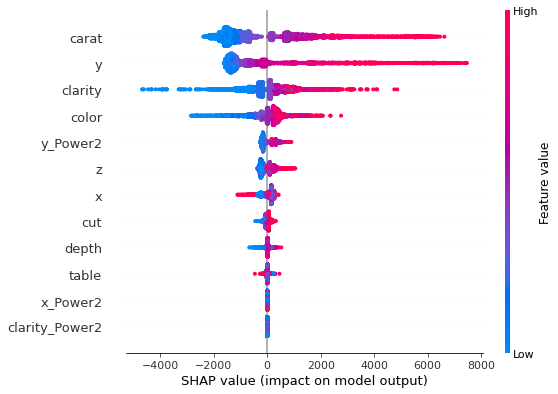

In [49]:
# model interpretation plots
regression.interpret_model(
    estimator=tuned_regression_model
)

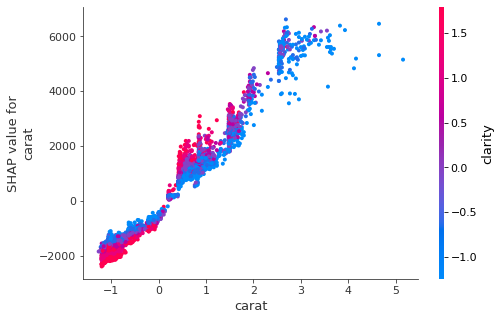

In [50]:
# model interpretation plots
regression.interpret_model(
    estimator=tuned_regression_model,
    plot='correlation'
)

In [51]:
# test set prediction
test_predictions = regression.predict_model(
    estimator=tuned_regression_model,
)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,284.5764,291640.823,540.0378,0.9815,0.1021,0.0785


In [52]:
# finalize model
final_regression_model = regression.finalize_model(
    estimator=tuned_regression_model
)

In [53]:
# display model
print(final_regression_model)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=100,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.6,
              n_estimators=170, n_jobs=-1, num_leaves=30, objective=None,
              random_state=1869, reg_alpha=0.1, reg_lambda=0.5, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


# clustering 

In [70]:
# split dataset
from sklearn.model_selection import train_test_split
X = df_iris[['sepal_length','sepal_width','petal_length','petal_width']]
y = df_iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
df_iris_train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
df_iris_test = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [71]:
# process dataset
clustering_experiment_1 = clustering.setup(
    data=df_iris_train,
    numeric_features=['sepal_length','sepal_width','petal_length','petal_width'],
    ignore_features=['species'],
    normalize=True
)

Setup Succesfully Completed!


,Description,Value
0,session_id,203
1,Original Data,"(105, 5)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(105, 4)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


In [72]:
# models info
clustering.models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster.KMeans
ap,Affinity Propagation,sklearn.cluster.AffinityPropagation
meanshift,Mean shift Clustering,sklearn.cluster.MeanShift
sc,Spectral Clustering,sklearn.cluster.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster.AgglomerativeClustering
dbscan,Density-Based Spatial Clustering,sklearn.cluster.DBSCAN
optics,OPTICS Clustering,sklearn.cluster.OPTICS
birch,Birch Clustering,sklearn.cluster.Birch
kmodes,K-Modes Clustering,git/nicodv/kmodes


In [73]:
# create model
# 'kmeans'        K-Means Clustering
# 'ap'            Affinity Propagation
# 'meanshift'     Mean shift Clustering
# 'sc'            Spectral Clustering
# 'hclust'        Agglomerative Clustering
# 'dbscan'        Density-Based Spatial Clustering
# 'optics'        OPTICS Clustering                               
# 'birch'         Birch Clustering                                 
# 'kmodes'        K-Modes Clustering  
clustering_model = clustering.create_model(
    model='kmeans',
    num_clusters=3,
)

,Metric
Silhouette,0.4738
Calinski-Harabasz,172.2650
Davies-Bouldin,0.7921


In [74]:
# assign clusters
clustering_results = clustering.assign_model(
    model=clustering_model
)

In [75]:
# view results
clustering_results.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster
0,6.7,3.1,4.7,1.5,versicolor,Cluster 0
1,6.3,2.9,5.6,1.8,virginica,Cluster 0
2,5.0,3.4,1.6,0.4,setosa,Cluster 1
3,5.0,3.5,1.3,0.3,setosa,Cluster 1
4,6.4,2.8,5.6,2.2,virginica,Cluster 0


In [76]:
# view results
clustering_results.groupby(by=['Cluster','species']).size()

Cluster    species   
Cluster 0  versicolor    10
           virginica     31
Cluster 1  setosa        36
Cluster 2  setosa         1
           versicolor    21
           virginica      6
dtype: int64

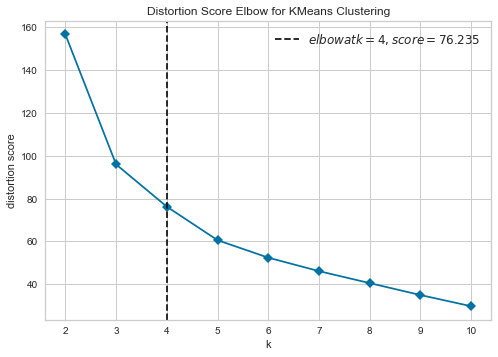

In [77]:
# plots
clustering.plot_model(
    model=clustering_model,
    plot='elbow'
)

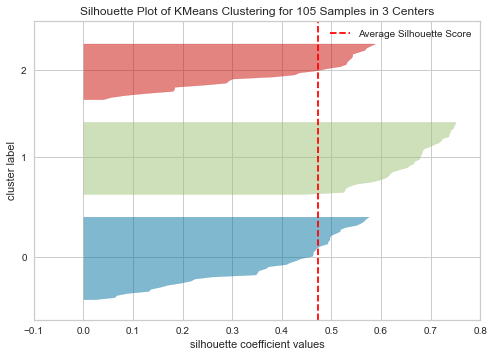

In [78]:
# plots
clustering.plot_model(
    model=clustering_model,
    plot='silhouette'
)

In [79]:
# plots
clustering.plot_model(
    model=clustering_model,
    plot='distribution',
    feature='sepal_width'
)

In [80]:
# plots
clustering.plot_model(
    model=clustering_model,
    plot='distribution',
    feature='species'
)

In [81]:
# model predictions
clustering_test_predictions = clustering.predict_model(
    clustering_model,
    data=df_iris_test
)

In [82]:
# view results
clustering_test_predictions.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster
0,6.7,3.3,5.7,2.1,virginica,Cluster 0
1,6.9,3.1,5.1,2.3,virginica,Cluster 0
2,5.4,3.4,1.7,0.2,setosa,Cluster 1
3,4.6,3.4,1.4,0.3,setosa,Cluster 1
4,5.1,3.7,1.5,0.4,setosa,Cluster 1


In [83]:
# view results
clustering_test_predictions.groupby(by=['Cluster','species']).size()

Cluster    species   
Cluster 0  versicolor     5
           virginica     11
Cluster 1  setosa        13
Cluster 2  versicolor    14
           virginica      2
dtype: int64